In [1]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imgs = [] # 画像のリスト
tmp = None
def w(img=None): # 最新の画像の横幅
    if img is None:
        return imgs[-1].size[0]
    else:
        return img.size[0]
def h(img=None): # 最新の画像の高さ
    if img is None:
        return imgs[-1].size[1]
    else:
        return img.size[1]
def s(img=None): # 最新の画像のサイズ
    if img is None:
        return imgs[-1].size
    else:
        return img.size
def i(): # 最新の画像
    return imgs[-1].copy()
def div(x, a, b): # 分数計算
    return int(np.round((x * a) / b))

def show(img=None): # img の画像を表示，なければ tmp の画像を表示
    if img is None:
        plt.imshow(np.array(tmp))
    else:
        plt.imshow(np.array(img))

In [3]:
def resize(img, width=None, height=None): # width, height の大きさにリサイズ
    if width is None and height is None:
        print(img.size)
        return img
    if width is None:
        width = div(w(img), height, h(img))
    if height is None:
        height = div(h(img), width, w(img))
    print((width, height))
    return img.resize((width, height), Image.LANCZOS)

def trim(img, width=None, height=None, w_off=0, h_off=0): # 1.91:1 になるようにトリミング，off はずらすための引数
    if height is None and width is None:
        width, height = img.size
        if width > height * 1.91:
            width = int(height * 1.91)
        else:
            height = div(width, 1, 1.91)
    elif height is None:
        width = min(w(img), width)
        height = div(width, 1, 1.91)
    elif width is None:
        height = min(h(img), height)
        width = int(height * 1.91)
    
    print((width, height))
    print('rate (aim: 1.91):', width/height)

    left = (w(img) - width) // 2 + w_off
    right = left + width
    if left < 0:
        right += (-left)
        left = 0
    elif right >= w(img):
        left -= (right - w(img))
        right = w(img)
    upper = (h(img) - height) // 2 + h_off
    lower = upper + height
    if upper < 0:
        lower += (-upper)
        upper = 0
    elif lower > h(img):
        upper -= (lower - h(img))
        lower = h(img)
    print('(left, upper, right, lower):', (left, upper, right, lower))
    return img.crop((left, upper, right, lower))

def add_band(img, icon, band_height): # 下の Hassy's Blog のところを表示
    text = "Nobuho Hashimoto"
    font_path = "/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf"
    font_size = div(band_height, 6, 10)
    font_color = (10, 142, 160)

    font = ImageFont.truetype(font_path, font_size)
    draw = ImageDraw.Draw(img)
    text_width, text_height = draw.textsize(text, font=font)
    draw_width = div(text_width, 21, 20) + band_height

    icon_width = (w(img) - draw_width) // 2
    img.paste(icon, (icon_width, (band_height - text_height) // 6), icon) # 少し上に配置

    height = (band_height - text_height) // 2
    width = icon_width + (draw_width - text_width)
    draw.text((width, height), text, font_color, font=font)

    return img

def add_title(img, band_height, fs=None, text1=None, text2=None, text3=None, lang=None): # タイトルを表示，最大三行まで
    font_path = "/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf" if lang == "eng" else "/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc"
    font_size = div(band_height, 7, 10)
    if fs is not None:
        font_size = int(font_size * fs)

    font_color = (243, 244, 247)

    font = ImageFont.truetype(font_path, font_size)
    draw = ImageDraw.Draw(img)
    text_width1, text_height1 = draw.textsize(text1, font=font)

    margin_right = w(img) // 10

    width1 = (w(img) - text_width1) - margin_right
    if text2 is None:
        height1 = (h(img) + band_height - text_height1) // 2
        draw.text((width1, height1), text1, font_color, font=font)
    elif text3 is None:
        height1 = (h(img) + band_height - (text_height1 * 5) // 2) // 2
        draw.text((width1, height1), text1, font_color, font=font)

        text_width2, text_height2 = draw.textsize(text2, font=font)
        width2 = (w(img) - text_width2) - margin_right
        height2 = height1 + (text_height1 * 3) // 2
        draw.text((width2, height2), text2, font_color, font=font)
    else:
        height1 = (h(img) + band_height - text_height1 * 4) // 2
        draw.text((width1, height1), text1, font_color, font=font)

        text_width2, text_height2 = draw.textsize(text2, font=font)
        width2 = (w(img) - text_width2) - margin_right
        height2 = height1 + (text_height1 * 3) // 2
        draw.text((width2, height2), text2, font_color, font=font)

        text_width3, text_height3 = draw.textsize(text3, font=font)
        width3 = (w(img) - text_width3) - margin_right
        height3 = height2 + (text_height2 * 3) // 2
        draw.text((width3, height3), text3, font_color, font=font)

    return img

machu-picchu.jpg
(3024, 1338)


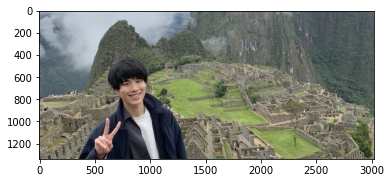

In [4]:
# 画像を読み込み
img_path = "machu-picchu.jpg"
ext = img_path.rsplit('.', 1)[1]
print(img_path)
tmp = Image.open(img_path).copy()
imgs += [tmp]
print(s())
show()

(1295, 573)


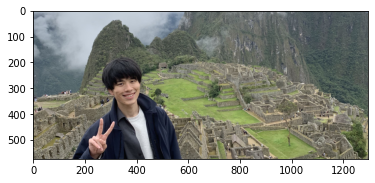

In [5]:
# 画像をリサイズ (画像, 幅, 高さ)
# 680 x 356
tmp = resize(i(), None, 573)
show()

In [6]:
imgs += [tmp]

(1095, 573)
rate (aim: 1.91): 1.9109947643979057
(left, upper, right, lower): (100, 0, 1195, 573)


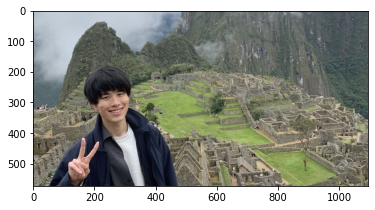

In [7]:
# 1095 x 573 にトリミング (画像, 幅, 高さ, 幅のオフセット, 高さのオフセット)
tmp = trim(i(), 1095, None, 0, 0)
show()

In [8]:
imgs += [tmp]

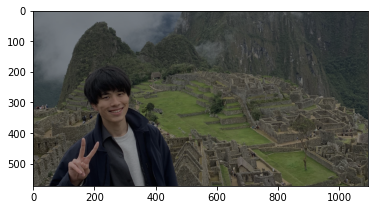

In [9]:
# 黒フィルタをかける
filt = Image.new("RGB", s(), (0, 0, 0)) # (0, 0, 0) のところが色
mask = Image.new("L", s(), 150) # 値が高いほど元の画像が強調される

tmp = Image.composite(i(), filt, mask)
show()

In [10]:
imgs += [tmp]

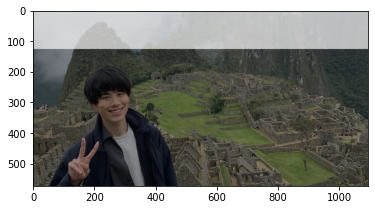

In [11]:
# 白の帯を作る
filt = Image.new("RGB", s(), (255, 255, 255)) # (255, 255, 255) のところが色

band_height = div(h(), 11, 50) # 帯の高さを全体の 11/50 にする
mask = Image.new("L", s(), 255)
draw = ImageDraw.Draw(mask)
draw.rectangle((0, 0, w(), band_height), fill=80) # 帯のところだけフィルタリング．値が高いほど元の画像が強調される
tmp = Image.composite(i(), filt, mask)
show()

In [12]:
imgs += [tmp]

(126, 126)


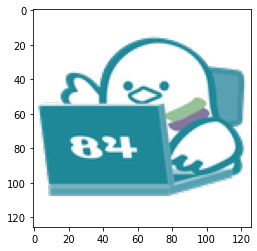

In [13]:
# favicon の読み込みと縮小 (帯の高さに揃える)
icon_path = "/Users/nhsmt1123/Documents/blog/eyecatch/favicon.png"
icon = Image.open(icon_path).copy()
icon = resize(icon, band_height, band_height)
show(icon)

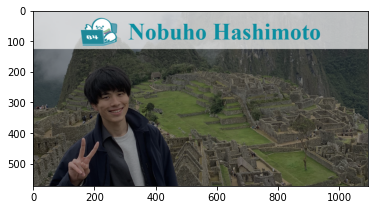

In [14]:
# 帯にアイコンとブログ名を追加
tmp = add_band(i(), icon, band_height)
show()

In [15]:
imgs += [tmp]

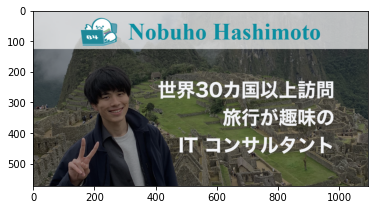

In [16]:
# タイトルを表示，三つ目の引数はフォントサイズの縮尺
tmp = add_title(i(), band_height, 0.7, "世界30カ国以上訪問", "旅行が趣味の", "IT コンサルタント")
show()

In [17]:
imgs += [tmp]

In [18]:
# 保存
i().save("thumbnail-ja.jpg", optimize=True, quality=90)

In [19]:
imgs = imgs[:-1]

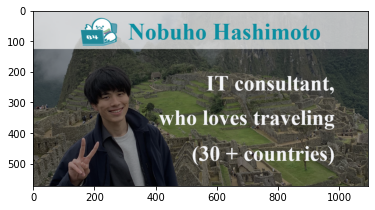

In [20]:
# タイトルを表示，三つ目の引数はフォントサイズの縮尺
tmp = add_title(i(), band_height, 0.8, "IT consultant,", "who loves traveling", "(30 + countries)", "eng")
show()

In [21]:
imgs += [tmp]

In [22]:
# 保存
i().save("thumbnail.jpg", optimize=True, quality=90)